This code extracts the raw data file from the mp3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa

Edit necessary data under savetxt line

In [ ]:
#loads mp3
file_path = '/content/drive/MyDrive/MP3 File analysis/20220123 - Ryuichi Sakamoto.mp3'
y, sr = librosa.load(file_path, sr=None)

# Print the values to verify
print(f'Sample Rate: {sr}')
print(f'Audio Time Series (first 10 samples): {y[:10]}')
print(f'Duration: {librosa.get_duration(y=y, sr=sr)} seconds')

#saves the mp3 file to your files
#replace BAL to matching name
import numpy as np
np.savetxt('20220123_audio_data.txt', y)


Sample Rate: 48000
Audio Time Series (first 10 samples): [ 0.0000000e+00 -1.4252168e-13  4.9056874e-13  2.3279946e-13
  5.8554626e-13  3.8643421e-13 -2.1426022e-13  2.5060021e-13
 -2.7965938e-13  5.7741924e-13]
Duration: 520.752 seconds


Graphs the MP3 File

Edit necessary data in the title line

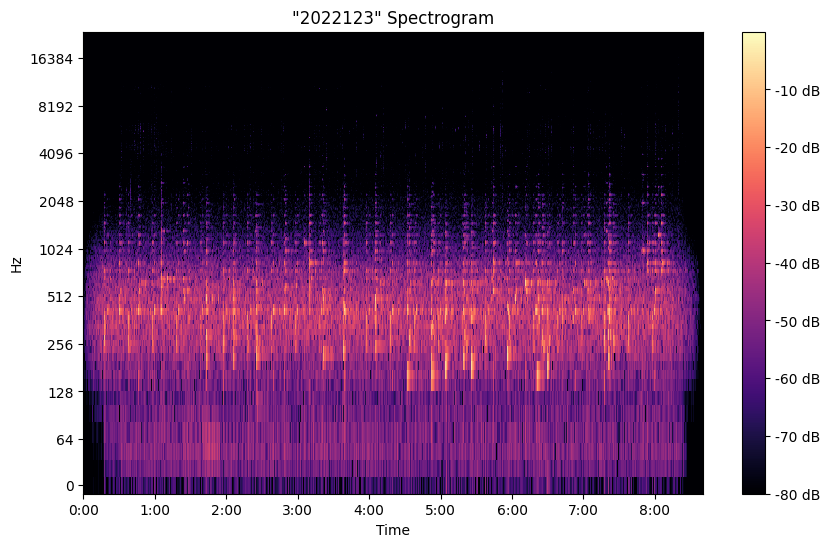

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Compute the short-time Fourier transform (STFT)
D = librosa.stft(y)

# Convert the complex-valued STFT to magnitude
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('''"2022123" Spectrogram''')
plt.show()


Melodic analysis

Edit necessary data in the title line

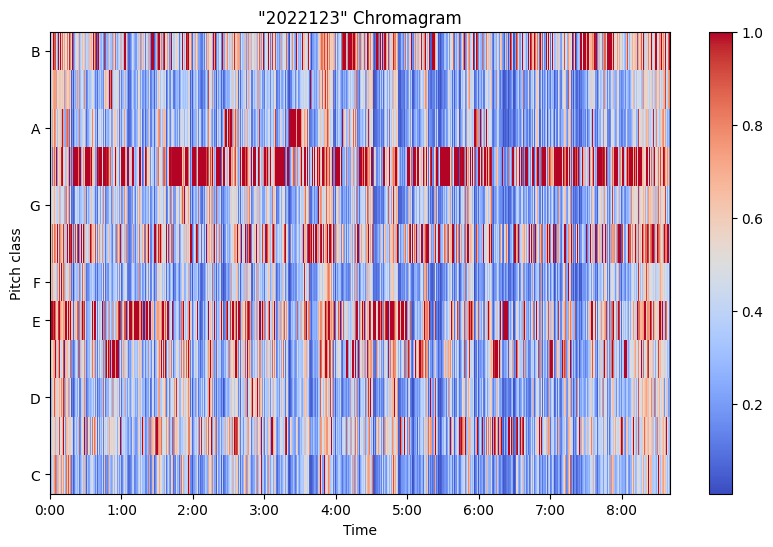

In [ ]:
# Extract pitch (melody) using the Harmonic-Percussive Source Separation (HPSS)
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Compute the chromagram
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Plot the chromagram
plt.figure(figsize=(10, 6))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('''"2022123" Chromagram''')
plt.show()




Extract chromagram data
edit necessary data under savetxt line

In [ ]:
np.savetxt('2022123_chromagram_data.txt', chromagram)

In [ ]:
import numpy as np

def analyze_chromagram(chromagram, threshold=0.5):
    time_frames = chromagram.shape[1]
    chord_frames = []
    melodic_frames = []

    for t in range(time_frames):
        # Get the pitches in this time frame
        pitches = chromagram[:, t]

        # Check how many pitches exceed the threshold
        strong_pitches = pitches > threshold

        if np.sum(strong_pitches) > 1:
            chord_frames.append(t)
        else:
            melodic_frames.append(t)

    return chord_frames, melodic_frames

# Analyze the chromagram with a chosen threshold
threshold = 0.5  # Adjust this threshold based on your data
chord_frames, melodic_frames = analyze_chromagram(chromagram, threshold)

print(f"Chord frames: {chord_frames}")
print(f"Melodic frames: {melodic_frames}")


Chord frames: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 

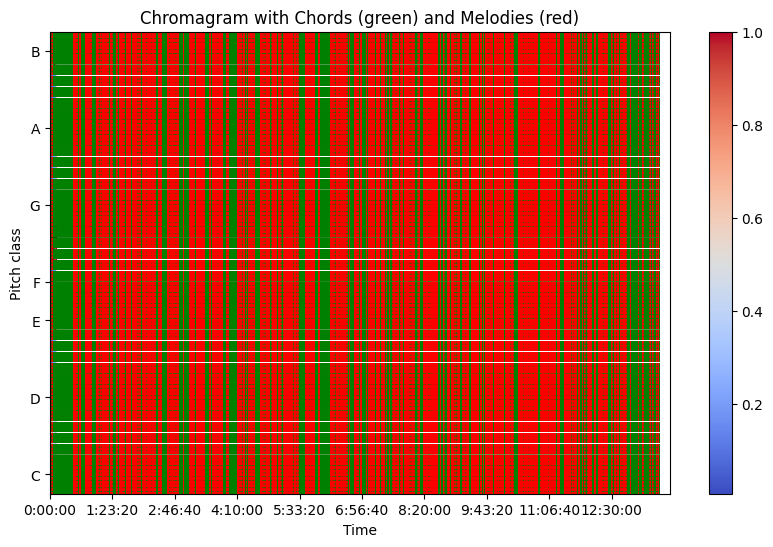

In [ ]:
# Visualize the chromagram with highlights for chords and melodies
plt.figure(figsize=(10, 6))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')

# Highlight chord frames
for t in chord_frames:
    plt.axvline(x=t, color='green', linestyle='--', linewidth=0.5)

# Highlight melodic frames
for t in melodic_frames:
    plt.axvline(x=t, color='red', linestyle='--', linewidth=0.5)

plt.colorbar()
plt.title('Chromagram with Chords (green) and Melodies (red)')
plt.show()


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the MP3 file (replace with your actual file path)
file_path = '/content/drive/MyDrive/MP3 File analysis/Boys_a_liar_pt.2.mp3'
y, sr = librosa.load(file_path, sr=None)

# Extract the harmonic component
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Compute the chromagram
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Identify the most prominent pitch at each time frame
prominent_pitches = np.argmax(chromagram, axis=0)

# Convert pitch classes to MIDI note numbers (optional)
# Assuming the chromagram is in standard pitch class order (C, C#, D, ..., B)
# You can add 60 to shift to the MIDI number of the corresponding octave if needed
midi_notes = prominent_pitches + 60

# Plot the prominent pitches over time
plt.figure(figsize=(12, 6))
plt.plot(midi_notes, label='Prominent Pitch (MIDI)', marker='o', linestyle=' ', color='b')
plt.xlabel('Time (frames)')
plt.ylabel('MIDI Note Number')
plt.title('Prominent Pitch Over Time')
plt.legend()
plt.show()
